In [2]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch

In [3]:
# View all available strategies
print(RunManager.get_strategies())
print(RunManager.get_run_names('StatArbStrategy'))

['BirdsStrategy', 'GapStrategy', 'MomentumStrategy', 'StatArbStrategy']
         Run                                        Description
0   run_0021  First run with new implementation of StrategyB...
1   run_0022  quarterly univ creation but with the new strat...
2   run_0023  Takes and stops for returns on individual pair...
3   run_0024  removed takes also testing bigger z score smoo...
4   run_0025  removed z exit score and only rely on takes an...
5   run_0026  removed z exit score and only rely on takes an...
6   run_0027  First run with completely overhauled construct...
7   run_0028  same as 27 just updated a handful of construct...
8   run_0029  Pairs2 with distance for returns averaged over...
9   run_0030  pairs2 but using returns instead of ranks for ...
10  run_0031                     tech only, pairs1 constructor1
11  run_0032              industrials only, pairs1 constructor1
12  run_0033                             consumer discretionary
13  run_0034                    

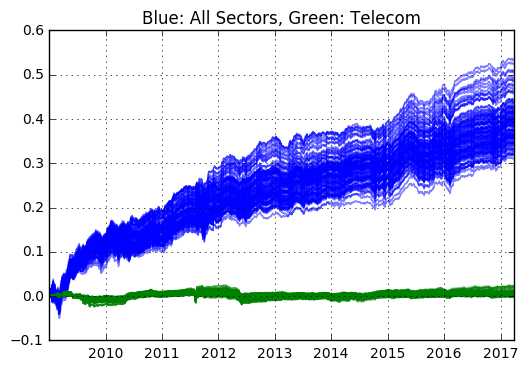

In [18]:
rm1 = RunManager('StatArbStrategy', 'run_0027', 2009)
rm2 = RunManager('StatArbStrategy', 'run_0040', 2009)

rm1.import_return_frame()
rm2.import_return_frame()

plt.figure()
plt.title('Blue: All Sectors, Green: Telecom')
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
plt.plot(rm2.returns.cumsum(), 'g', alpha=.5)

plt.grid()
plt.show()

In [14]:
comb = CombinationSearch()
comb.add_run(rm4)
comb.start(10)


  0%|                                                   | 0/10 [00:00<?, ?it/s]

100%|██████████████████████████████████████████| 10/10 [02:47<00:00, 16.70s/it]


In [15]:
comb2 = CombinationSearch()
comb2.add_run(rm3)
comb2.start(10)

100%|██████████████████████████████████████████| 10/10 [02:45<00:00, 16.55s/it]


In [17]:
x1 = rm4.returns
x2 = comb.best_results_rets.dropna()
x1 = x1.loc[x2.index]

x3 = comb2.best_results_rets.dropna()

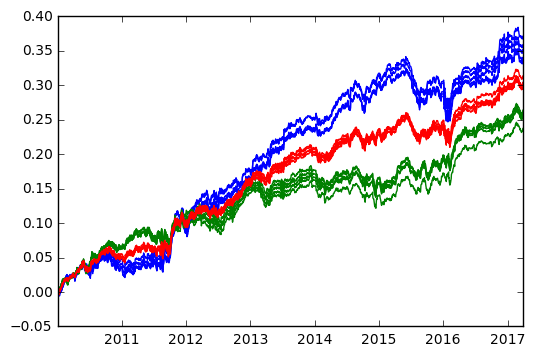

In [20]:
plt.figure()
#plt.plot(x1.cumsum(), '#999999', alpha=.05)
plt.plot(x2.cumsum(), 'b')
plt.plot(x3.cumsum(), 'g')
plt.plot(((x2 + x3)/2.).cumsum(), 'r')
plt.show()

In [10]:
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,max_holding_days,10,48,0.468889,0.088936,6.214833,0.001620,0.034625,10.000000,0.146758,1.407828,-0.156525,1844.096591
1,max_holding_days,30,48,0.463744,0.088375,7.651989,0.001866,0.057162,28.411616,0.154036,1.937500,-0.169431,1561.842172
2,max_pos_prop,0.03,48,0.391489,0.081446,6.568368,0.001434,0.042999,19.212121,0.150785,1.690025,-0.166076,1731.696970
3,max_pos_prop,0.06,48,0.541144,0.095864,7.298454,0.002052,0.048788,19.199495,0.150009,1.655303,-0.159879,1674.241793
4,n_pairs,100,32,0.471799,0.086329,7.169604,0.001783,0.048212,18.987689,0.131500,1.584280,-0.149336,867.030303
5,n_pairs,200,32,0.473809,0.090300,6.905675,0.001765,0.045616,19.263258,0.153318,1.687500,-0.165732,1718.548295
6,n_pairs,300,32,0.453341,0.089337,6.724954,0.001681,0.043852,19.366477,0.166374,1.746212,-0.173865,2523.329545
7,pos_perc_deviation,0.1,96,0.466316,0.088655,6.933411,0.001743,0.045893,19.205808,0.150397,1.672664,-0.162978,1702.969381
8,remove_earnings,False,48,0.484915,0.089475,7.439378,0.001921,0.055618,19.373106,0.159173,1.743687,-0.173082,1603.901515
9,remove_earnings,True,48,0.447718,0.087835,6.427444,0.001565,0.036169,19.038510,0.141621,1.601641,-0.152873,1802.037247


In [5]:
rm2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,max_holding_days,10,48,0.468889,0.088936,6.214833,0.001620,0.034625,10.000000,0.146758,1.407828,-0.156525,1844.096591
1,max_holding_days,30,48,0.463744,0.088375,7.651989,0.001866,0.057162,28.411616,0.154036,1.937500,-0.169431,1561.842172
2,max_pos_prop,0.03,48,0.391489,0.081446,6.568368,0.001434,0.042999,19.212121,0.150785,1.690025,-0.166076,1731.696970
3,max_pos_prop,0.06,48,0.541144,0.095864,7.298454,0.002052,0.048788,19.199495,0.150009,1.655303,-0.159879,1674.241793
4,n_pairs,100,32,0.471799,0.086329,7.169604,0.001783,0.048212,18.987689,0.131500,1.584280,-0.149336,867.030303
5,n_pairs,200,32,0.473809,0.090300,6.905675,0.001765,0.045616,19.263258,0.153318,1.687500,-0.165732,1718.548295
6,n_pairs,300,32,0.453341,0.089337,6.724954,0.001681,0.043852,19.366477,0.166374,1.746212,-0.173865,2523.329545
7,pos_perc_deviation,0.1,96,0.466316,0.088655,6.933411,0.001743,0.045893,19.205808,0.150397,1.672664,-0.162978,1702.969381
8,remove_earnings,False,48,0.484915,0.089475,7.439378,0.001921,0.055618,19.373106,0.159173,1.743687,-0.173082,1603.901515
9,remove_earnings,True,48,0.447718,0.087835,6.427444,0.001565,0.036169,19.038510,0.141621,1.601641,-0.152873,1802.037247


In [17]:
# ~~~~~~ RunAggregator ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ra = RunAggregator()

# ra.add_run(rm1)
ra.add_run(rm1)
ra.add_run(rm3)

returns = ra.aggregate_returns()

In [24]:
returns.iloc[700:].mean() * 252

StatArbStrategy_run_0028_0      0.029027
StatArbStrategy_run_0028_1      0.030036
StatArbStrategy_run_0028_2      0.027379
StatArbStrategy_run_0028_3      0.030215
StatArbStrategy_run_0028_4      0.026101
StatArbStrategy_run_0028_5      0.027883
StatArbStrategy_run_0028_6      0.028664
StatArbStrategy_run_0028_7      0.029015
StatArbStrategy_run_0028_8      0.029033
StatArbStrategy_run_0028_9      0.033658
StatArbStrategy_run_0028_10     0.029184
StatArbStrategy_run_0028_11     0.032883
StatArbStrategy_run_0028_12     0.027350
StatArbStrategy_run_0028_13     0.033926
StatArbStrategy_run_0028_14     0.028921
StatArbStrategy_run_0028_15     0.034886
StatArbStrategy_run_0028_16     0.029530
StatArbStrategy_run_0028_17     0.035710
StatArbStrategy_run_0028_18     0.029372
StatArbStrategy_run_0028_19     0.035463
StatArbStrategy_run_0028_20     0.028476
StatArbStrategy_run_0028_21     0.034875
StatArbStrategy_run_0028_22     0.029201
StatArbStrategy_run_0028_23     0.034815
StatArbStrategy_

In [42]:
df = pd.DataFrame({'Rets': rm3.returns['26']}).reset_index()
df.columns = ['Date', 'Rets']

In [43]:
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]

In [44]:
df.groupby('Year')['Rets'].sum()

Year
2009    0.114857
2010    0.016594
2011    0.060064
2012    0.040255
2013    0.037326
2014    0.021170
2015    0.040347
2016    0.021810
2017    0.017267
Name: Rets, dtype: float64

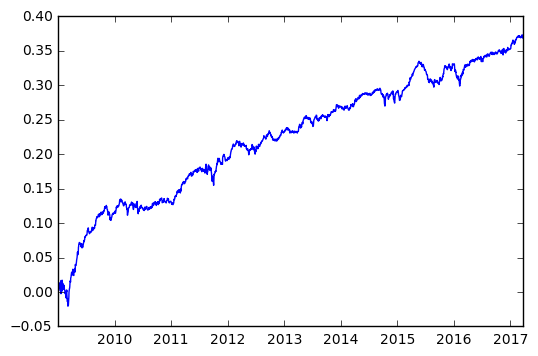

In [47]:
df2 = df.set_index('Date')

plt.figure()
plt.plot(df2.Rets.cumsum())